# Пайплайн решения

Изначально, еще до презентации хакатона было выдвинуто предложение об использовании API интерфейса какого-нибудь чат бота. Он бы реализовывал поиск упоминания компании и производил sentiment анализ новости по данной компании. Учитывая, что большинство чат ботов для обращения к ним требуют подключения VPN, а организаторы при тестировании, с высокой вероятностью, не будут его использовать, выбор стоял между русскоязычными моделями и Gemini, т.к. он не требовал VPN.

Выбор был сделан в пользу Gemeni по следующим причинам:
1. **Большой доступный контекст**: Gemini имеет доступ к большому объему контекста в одном запросе **(128000 символов)**, что дает возможность анализировать сообщения практически неограниченного объема.
2. **Точность**: Сравнимая с GPT, точность Gemini позволяет точно находить упоминания и понимать контекст в sentiment анализе.
С кодом решения Вы можете ознакомиться в Gemimi.ipynb


### Пример  вывода программы Gemimi.ipynb
**input:**
Компания "Киви" возглавляет рейтинг худших акций за квартал после отзыва лицензии у банка. Теперь у компании всё плохо. 🔸С 4 по 9 апреля министр финансов США Джанет Йеллен совершает свой второй визит в Китай. 🔸CEO Ripple ожидает, (https://www.cnbc.com/2024/04/08/ripple-ceo-crypto-market-to-double-in-size-to-5-trillion-in-2024.html) что совокупный марткеткап криптовалют удвоится в этом году и превысит $5 трлн из-за сильных притоков в спотовые BTC-ETF, халвинга в BTC, и прогресса в регулировании криптовалют в США. 🔸Саудовская Аравия в мае поднимет цены на большинство сортов нефти для Азии 🔸Уровень безработицы в США сейчас на исторически низком уровне и уже возможно прошел свое дно в этом цикле 🔸Нефть Urals сейчас торгуется выше 5-летнего среднего значения и выше, чем торговалась 1 год и 2 года назад в это же время 🔸Лукойл проинвестировал в шельф Казахстана - компания заплатила $200 млн за долю в Каламкас-море. 🔸Март стал лучшим с начала года месяцем для рынка коллективных инвестиций. Пайщики вложили в розничные паевые инвестиционные фонды (ПИФы) более 16,7 млрд руб., что в шесть раз выше показателя февраля. 🔸Производитель крабовых палочек Vici готовится к (https://www.kommersant.ru/doc/6633767) продаже российского бизнеса 🔸Выручка фитнес-клубов в России за I квартал 2024 года составила (https://www.forbes.ru/biznes/509776-vyrucka-fitnes-klubov-v-rossii-za-i-kvartal-2024-goda-sostavila-pocti-50-mlrd-rublej?utm_source=forbes&utm_campaign=lnews) почти 50 млрд рублей 🔸Видео обзор был тут (https://t.me/profitanet/6507) Врываемся в рабочую неделю? ☕️☕️☕️

**output:**
Company Sentences: - Компания "Киви" возглавляет рейтинг худших акций за квартал после отзыва лицензии у банка.
- Теперь у компании всё плохо.
Очень негативно

## Отказ от Gemini

После презентации хакатона от идеи решения задачи при помощи Gemini пришлось отказаться ввиду следующих причин:
1) **Снижение баллов за использование интернета в решении**
2) **Снижение баллов за недостаточно высокую скорость выполнения программы**
3) **Ограничение по количеству запросов в день**

### Далее задача была разделена на 2 подзадачи, поиск упоминаний и sentiment анализ

## I Поиск упоминаний

Изначально было выдвинуто предложение использовать **regex** т.к. это самый быстрый способ взаимодействия со строками.
Первой версией алгоритма поиска упоминаний был алгоритм в изложенный в файле **searcher.ipynb**
1) был создан датасет **names and synonyms_upd.xlsx** со столбцом Company_Ident_Text, в котором содержатся все синонимы для названия данной компании 

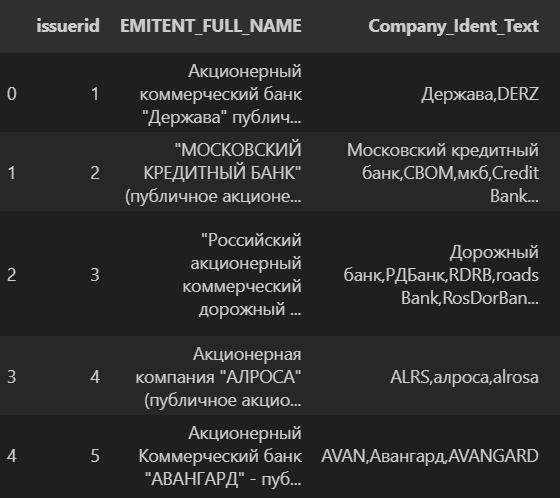

2) При помощи происходит проход по всем сообщениям и поиск упоминания названия (или синонима) для каждой каждой комппании если в сообщении есть упоминание то сохраняется комбинация issuerid	synonym	messageid	ChannelID	DatePosted	MessageText

В результате получаем датасет вида

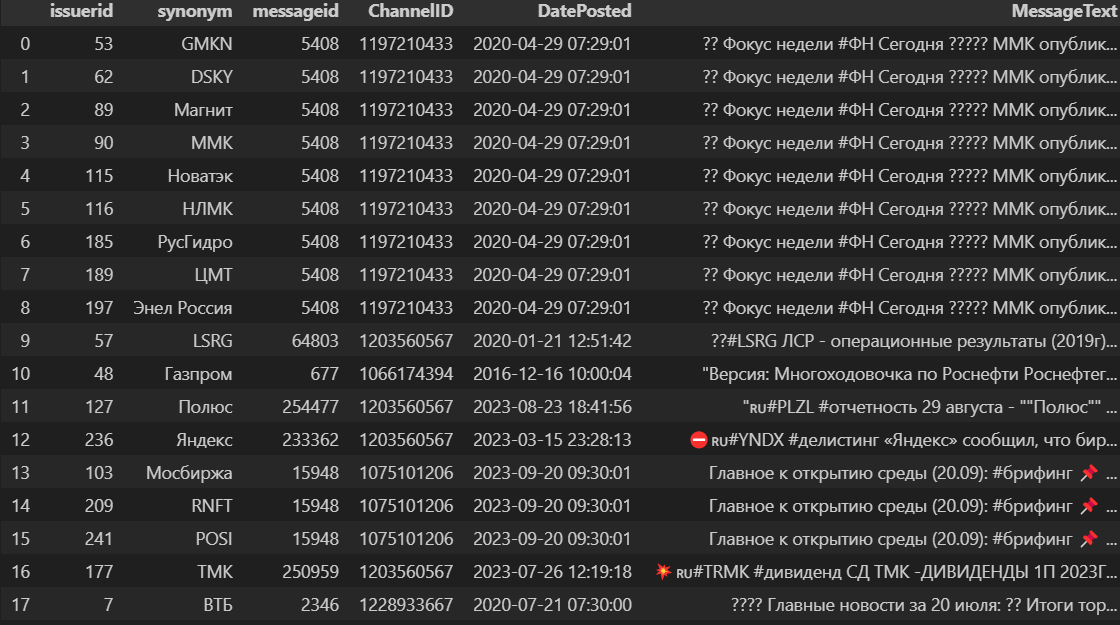

Также был добавлен алгоритм вычленения контекста (результирующий контекст является текстом между упоминанием необходимой компании и упоминанием другой компании, если она есть),  если необходимая компания упоминается вперемешку с другими, то все необходимые упоминания вычленяются корректно

Ниже представлен конечный  вариант кода алгоритма поиска упоминания и вывод его работы

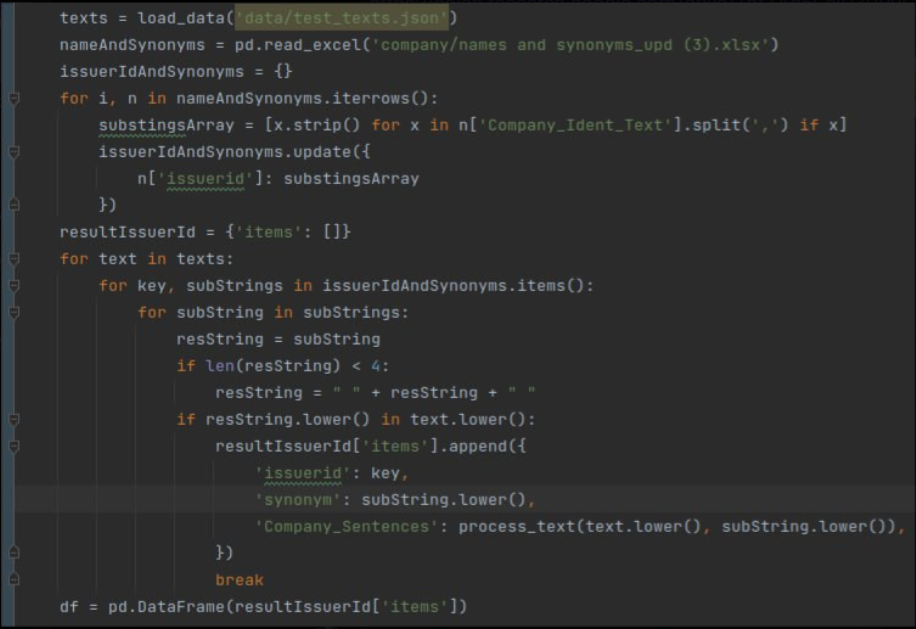

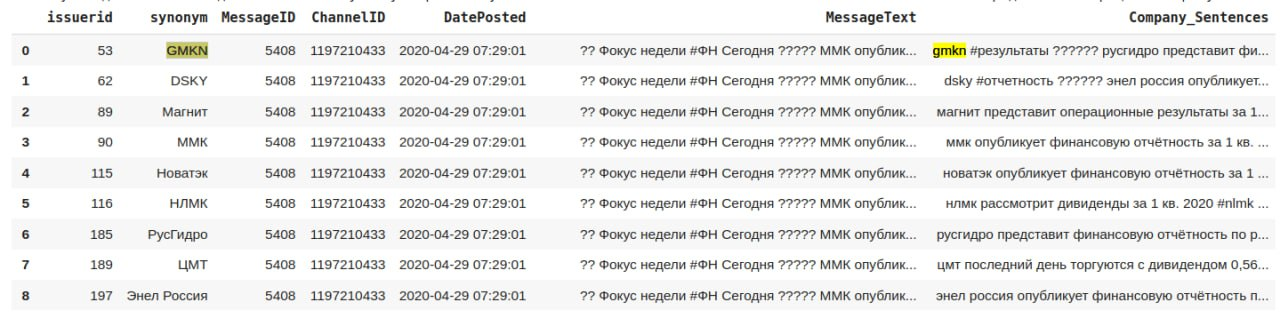

# II Sentiment анализ

### BERT
BERT (Bidirectional Encoder Representations from Transformers) является одним из самых мощных и эффективных предварительно обученных моделей для обработки естественного языка. Он имеет множество преимуществ и некоторые недостатки при использовании в сентимент анализе.

Плюсы использования BERT в сентимент анализе:

1. **Понимание контекста**: BERT способен понимать контекст и зависимости между словами в предложении благодаря своей двунаправленной архитектуре. Это позволяет ему лучше улавливать смысл и эмоциональную окраску текста.

2. **Высокая точность**: BERT демонстрирует высокую точность в решении различных задач обработки естественного языка, включая сентимент анализ. Его представления могут улавливать сложные зависимости в тексте и выделять ключевые аспекты эмоциональной окраски.

Недостатки использования BERT в сентимент анализе:

1. **Вычислительная сложность**: BERT - это глубокая нейронная сеть с множеством параметров, что делает его вычислительно затратным в обучении и использовании, особенно при больших объемах данных.

2. **Сильная зависимость точности от объема обучающих данных**: BERT требует большого объема данных для эффективного обучения, и его применение может быть неэффективным при малых наборах данных для сентимент анализа.

В условиях  ограниченнисти временных, вычислительных  и информационных ресурсов было принято  решение сместить свое внимание на более простые модели

### Logistic Regression
Логистическая регрессия (Logistic Regression) - это простой, линейный метод классификации, который часто используется в сентимент анализе из-за своей простоты и интерпретируемости.

Плюсы использования логистической регрессии:

1. **Простота интерпретации**: Результаты логистической регрессии легко интерпретировать. Коэффициенты модели позволяют понять, как каждый признак влияет на вероятность принадлежности к определенному классу, что делает модель понятной для специалистов в области.

2. **Эффективность при небольшом объеме данных**: Логистическая регрессия хорошо работает с небольшими объемами данных, что делает ее привлекательным выбором для начальной модели в сентимент анализе.

3. **Низкая вычислительная сложность**: В отличие от более сложных моделей, таких как нейронные сети или ансамбли, логистическая регрессия имеет низкую вычислительную сложность, что ускоряет процесс обучения и предсказания.

## Идеи по улучшению работы алгоритма

1. **Использование ансамбля моделей**: Создание ансамбля моделей с использованием нескольких сентимент анализаторов, где предсказания каждой модели взвешиваются с помощью коэффициентов учитывающих лосс соответственной модели, полученных на тестовых данных. Это позволит учесть различные точки зрения и улучшить качество предсказаний за счет совместного анализа.

2. **Добавление алгоритмов предобработки текста**: Использование различных алгоритмов предобработки текста, таких как удаление стоп-слов, лемматизация, нормализация и т. д., чтобы улучшить качество входных данных для модели. Это может помочь уменьшить шум в данных и выделить ключевые признаки, что приведет к более точным предсказаниям.

3. **Увеличение объема данных**: Попытка собрать или сгенерировать больше данных для обучения модели. Больший объем данных может помочь модели лучше обучиться на разнообразных примерах и повысить ее обобщающую способность.
